TIME SERIES FORECASTING

In [77]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()


In [78]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("GOOG",
                   start=start_date,
                   end=end_date,
                   progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2024-09-05,157.779999,161.014999,157.520004,158.600006,158.391510,14139500
247,2024-09-06,158.690002,159.220001,151.934998,152.130005,151.930008,24999100
248,2024-09-09,153.630005,154.639999,148.199997,149.539993,149.539993,28057700
249,2024-09-10,151.449997,152.300003,149.542999,150.009995,150.009995,20401800
250,2024-09-11,151.089996,152.479996,148.699997,152.149994,152.149994,18991500


In [79]:
yt = data[["Date", "Close"]]
yt.head()

,Date,Close
0,2023-09-13,137.500000
1,2023-09-14,138.990005
2,2023-09-15,138.300003
3,2023-09-18,138.960007
4,2023-09-19,138.830002


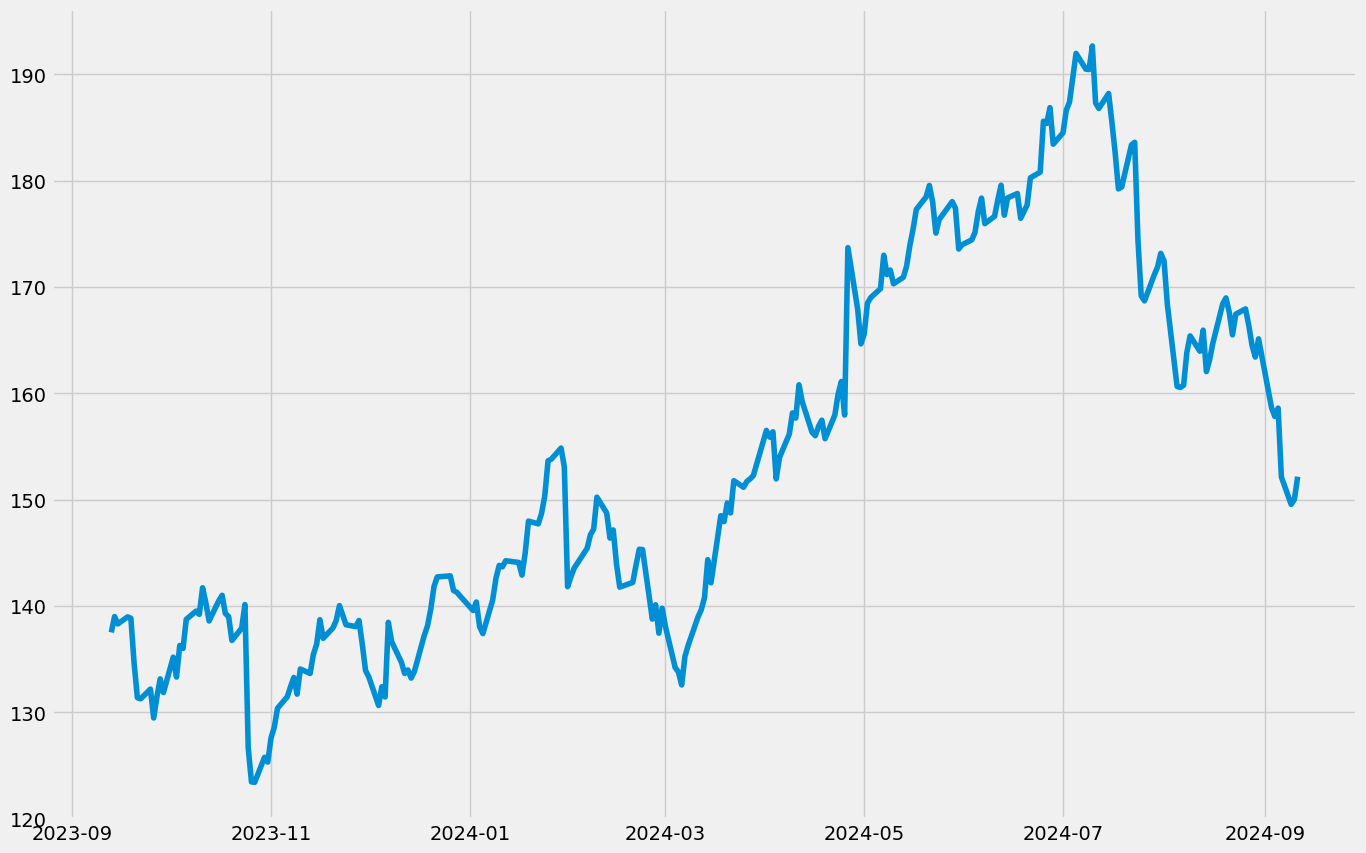

In [80]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(yt["Date"],yt["Close"])

<Figure size 640x480 with 0 Axes>

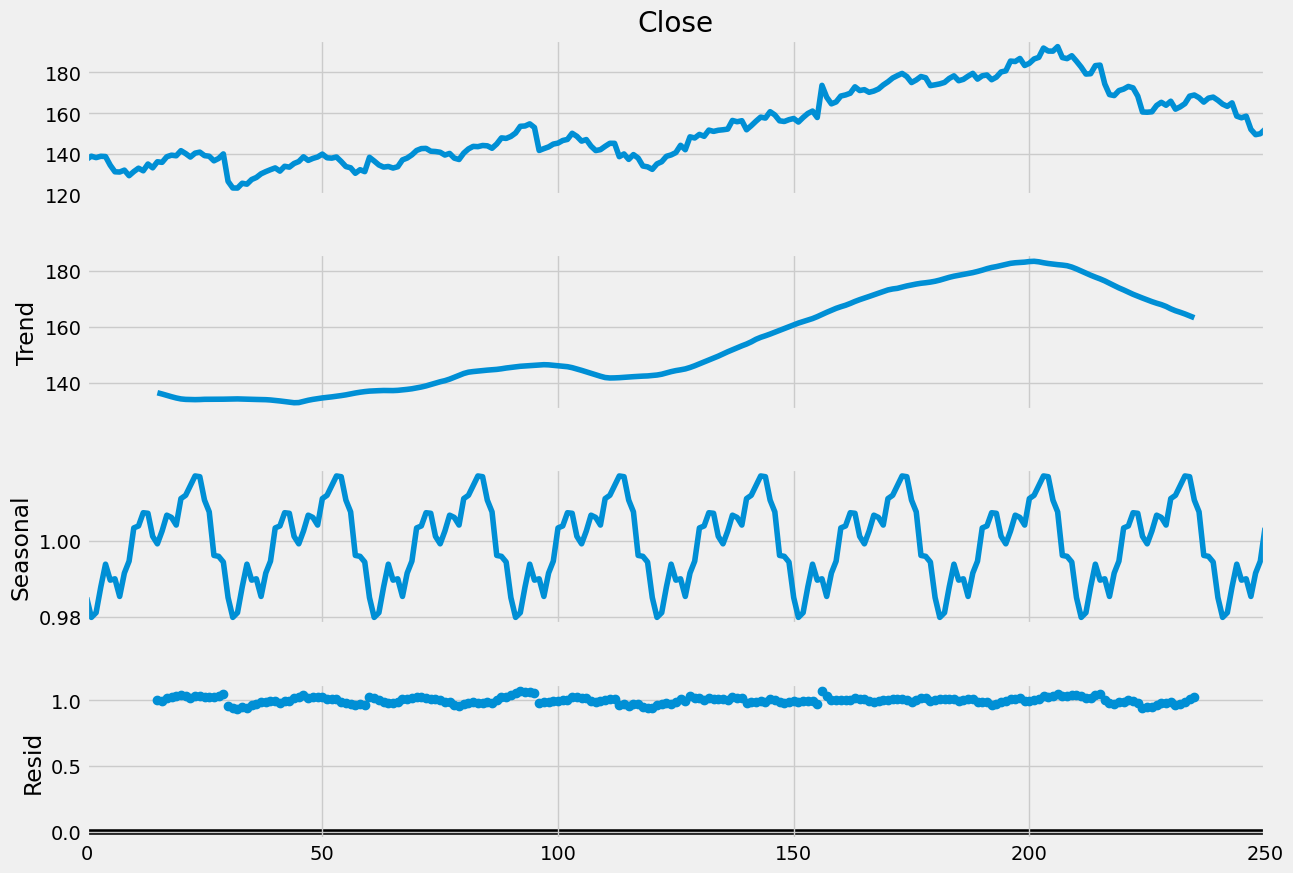

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yt["Close"],
                            model="multiplicative",
                            period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

In [82]:
yt = yt.set_index("Date")
print(yt)


                 Close
Date                  
2023-09-13  137.500000
2023-09-14  138.990005
2023-09-15  138.300003
2023-09-18  138.960007
2023-09-19  138.830002
...                ...
2024-09-05  158.600006
2024-09-06  152.130005
2024-09-09  149.539993
2024-09-10  150.009995
2024-09-11  152.149994

[251 rows x 1 columns]


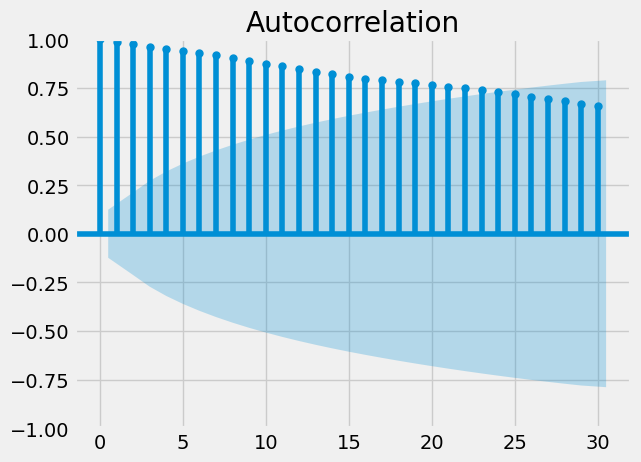

In [83]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(yt, lags=30)
plt.show()

In [84]:
p,d,q = 5,1,2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(yt["Close"], order = (p,d,q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -603.809
Date:                Thu, 12 Sep 2024   AIC                           1223.618
Time:                        17:57:42   BIC                           1251.789
Sample:                             0   HQIC                          1234.956
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2600      1.016     -0.256      0.798      -2.251       1.731
ar.L2          0.5922      0.978      0.605      0.545      -1.325       2.510
ar.L3         -0.0386      0.105     -0.369      0.7

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
predictions = fitted.predict()
print(predictions)

Date
2023-09-13      0.000000
2023-09-14    137.499974
2023-09-15    138.952516
2023-09-18    138.267063
2023-09-19    138.892387
                 ...    
2024-09-05    157.815243
2024-09-06    158.938422
2024-09-09    152.259919
2024-09-10    149.524978
2024-09-11    150.394773
Name: predicted_mean, Length: 251, dtype: float64


In [86]:
import warnings
freq = pd.infer_freq(yt.index)
model = sm.tsa.statespace.SARIMAX(yt["Close"],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12),
                                  freq=freq)
model = model.fit()
print(model.summary())

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -586.223
Date:                            Thu, 12 Sep 2024   AIC                           1202.446
Time:                                    17:58:03   BIC                           1254.530
Sample:                                         0   HQIC                          1223.437
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2677      0.925     -1.370      0.171      -3.081       0.545
ar.L2         -0.3727      0.946   

In [87]:
predictions = model.predict(start= len(yt), end = len(yt)+10, freq = "d")

today = date.today()
tomorrow = today + timedelta(days=1)

from pandas import date_range

num_days = predictions.shape[0]
new_index = date_range(start=tomorrow, periods=num_days, freq='D')

predictions = np.array(predictions)
predictions = pd.DataFrame(predictions, index=new_index)

print(predictions)

                     0
2024-09-13  151.335115
2024-09-14  154.030528
2024-09-15  153.729511
2024-09-16  153.952866
2024-09-17  153.870196
2024-09-18  154.007358
2024-09-19  154.260265
2024-09-20  155.023463
2024-09-21  155.379686
2024-09-22  155.953112
2024-09-23  155.328953


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [88]:
yt.index = pd.to_datetime(yt.index)
predictions.index = pd.to_datetime(predictions.index)


In [89]:

yt_filtered = yt.loc[start_date:]
predictions_filtered = predictions.loc[start_date:]


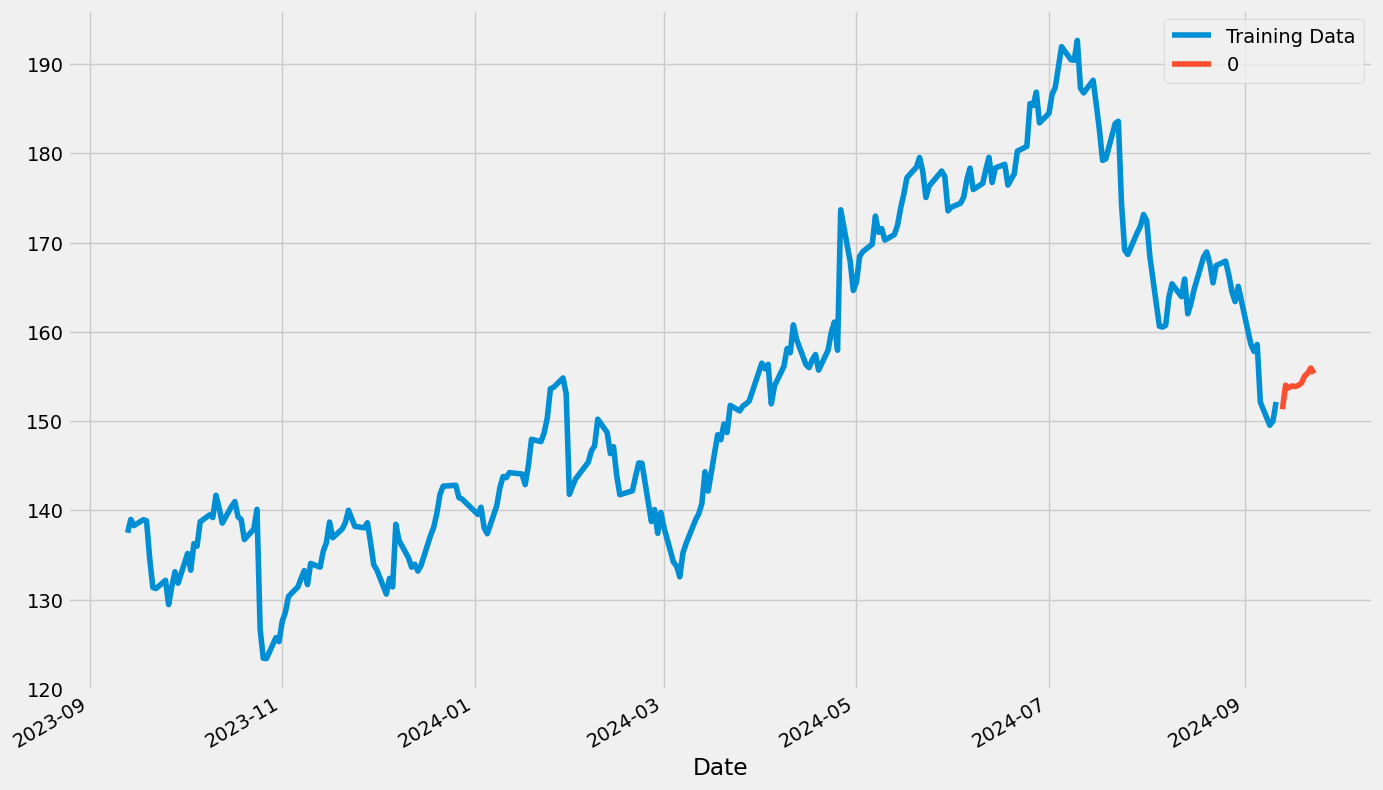

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
yt_filtered["Close"].plot(ax=ax, legend=True, label="Training Data")
predictions_filtered.plot(ax=ax, legend=True, label="Hi")
plt.legend()
plt.show()
